In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
from sklearn.preprocessing import StandardScaler

import pandas as pd
import seaborn as sns

In [2]:
# Read provided data
x_train = pd.read_csv("../../data/raw/train_values.csv")
y_train = pd.read_csv("../../data/raw/train_labels.csv")
x_test = pd.read_csv("../../data/raw/test_values.csv")

In [12]:
scaler = StandardScaler()
x_train_enc = pd.get_dummies(x_train)
scaler = scaler.fit(x_train_enc)
x_train_scaled = scaler.transform(x_train_enc)

In [ ]:
print(x_train[:100].shape)

# But first we need to transform the categorical features
#x_train_lle = pd.get_dummies(x_train_scaled)
print(x_train_lle[:100].shape)

# LLE
embedding = LocallyLinearEmbedding(n_neighbors=5, n_components=3)
x_transformed = embedding.fit_transform(x_train_lle[:100])

print(x_transformed.shape)

In [ ]:
print(x_train[:100].shape)

# But first we need to transform the categorical features
#x_train_isomap = pd.get_dummies(x_train_scaled)
print(x_train_isomap[:100].shape)

# Isomap
embedding = Isomap(n_neighbors=5, n_components=2)
x_transformed = embedding.fit_transform(x_train_isomap[:100])

print(x_transformed.shape)

(100, 39)
(260601, 69)
(10000, 2)
[0.09126121 0.05035695]


<Axes: >

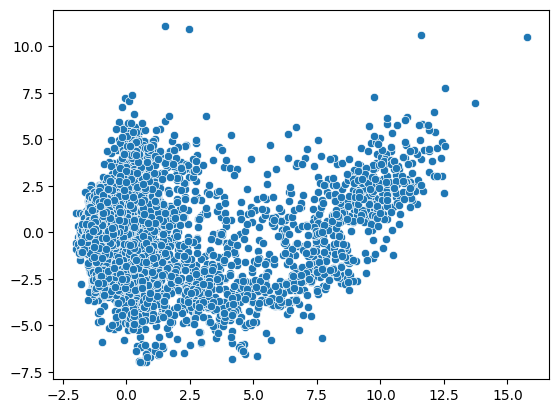

In [24]:
print(x_train[:100].shape)

# But first we need to transform the categorical features
#x_train_pca = pd.get_dummies(x_train_scaled)
print(x_train_scaled.shape)

# PCA
embedding = PCA(n_components=2)
x_transformed = embedding.fit_transform(x_train_scaled[:10000])

print(x_transformed.shape)
print(embedding.explained_variance_ratio_)
sns.scatterplot(x=x_transformed[:, 0], y=x_transformed[:, 1])

# Define function

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE


def dimensionality_reduction(data=None, method=None, n_neighbors=None, n_components=2, random_seed=42):
    """
    Applies a dimensionality reduction method on the given data. 
    Implemented methods are LLE, Isomap, PCA and TSNE. 
    
    The features in the given dataframe have to be numerical and normalized.
    
    
    """
    assert method in ["LLE", "Isomap", "PCA", "TSNE"]
    
    if method == "LLE":
        embedding = LocallyLinearEmbedding(n_components=n_components)
    elif method == "Isomap":
        embedding = Isomap(n_components=n_components)
    elif method == "PCA":
        embedding = PCA(n_components=n_components, random_state=random_seed)
    elif method == "TSNE":
        embedding = TSNE(n_components=n_components)
    else: 
        print(f"[ERROR] Dimensionality reduction method '{method}' is not implemented")
        
    data_transformed = embedding.fit_transform(data)
    
    return data_transformed